<a href="https://colab.research.google.com/github/gamzesever/GlobalAIHubMachineLearningCourse/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10000, 
                           n_features=8,  
                           n_redundant=5,
                           class_sep=2,
                           n_classes=2,
                           random_state=42)



In [ ]:
print("X :", X.shape)
print("y:",y.shape)

X : (10000, 8)
y: (10000,)


In [ ]:
data=pd.DataFrame(X,y)
data.head()

,0,1,2,3,4,5,6,7
1,1.570339,-0.090256,-0.079375,2.401295,2.552359,-0.304041,-2.442655,0.916269
1,0.161228,4.311882,-0.694232,2.738631,1.624223,-0.360108,1.991535,-1.863865
1,-0.097647,5.998483,-0.946572,3.306883,1.730441,-1.207989,3.261702,-2.772383
1,0.379694,-0.592654,0.071441,0.251402,0.437192,-0.853528,-0.886827,0.480193
0,-1.175445,0.427267,0.002303,-1.589990,-1.797124,0.460638,2.015058,-0.848841


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 0
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
dtypes: float64(8)
memory usage: 703.1 KB


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.000744,0.009470,-0.001459,0.004299,0.001763,-0.013245,0.006049,-0.004706
std,1.020212,2.732813,0.435734,2.196331,1.854213,0.991404,2.147087,1.383088
min,-1.903044,-7.590052,-1.288724,-6.049091,-4.729942,-3.655087,-5.494162,-3.508626
25%,-1.077911,-1.206806,-0.199286,-2.008139,-1.850937,-0.700152,-1.990073,-1.088165
50%,-0.043279,-0.017204,-0.021212,0.183751,0.343452,-0.006256,0.813082,-0.190504
75%,0.657830,1.455054,0.243428,2.017266,1.386240,0.663826,1.998528,1.115610
max,3.498878,7.975255,1.244437,5.311074,5.655530,3.691625,3.907668,3.583126


In [ ]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [ ]:

data.groupby(by=y).count()

,0,1,2,3,4,5,6,7
0,4999,4999,4999,4999,4999,4999,4999,4999
1,5001,5001,5001,5001,5001,5001,5001,5001


In [ ]:
data.duplicated().sum()

0

In [ ]:

plt.rcParams['figure.figsize'] = (20.0, 10.0)

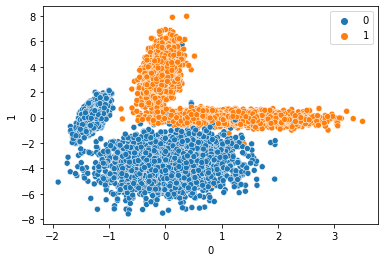

In [ ]:

sns.scatterplot(x=0, y=1, hue=y, data=data)

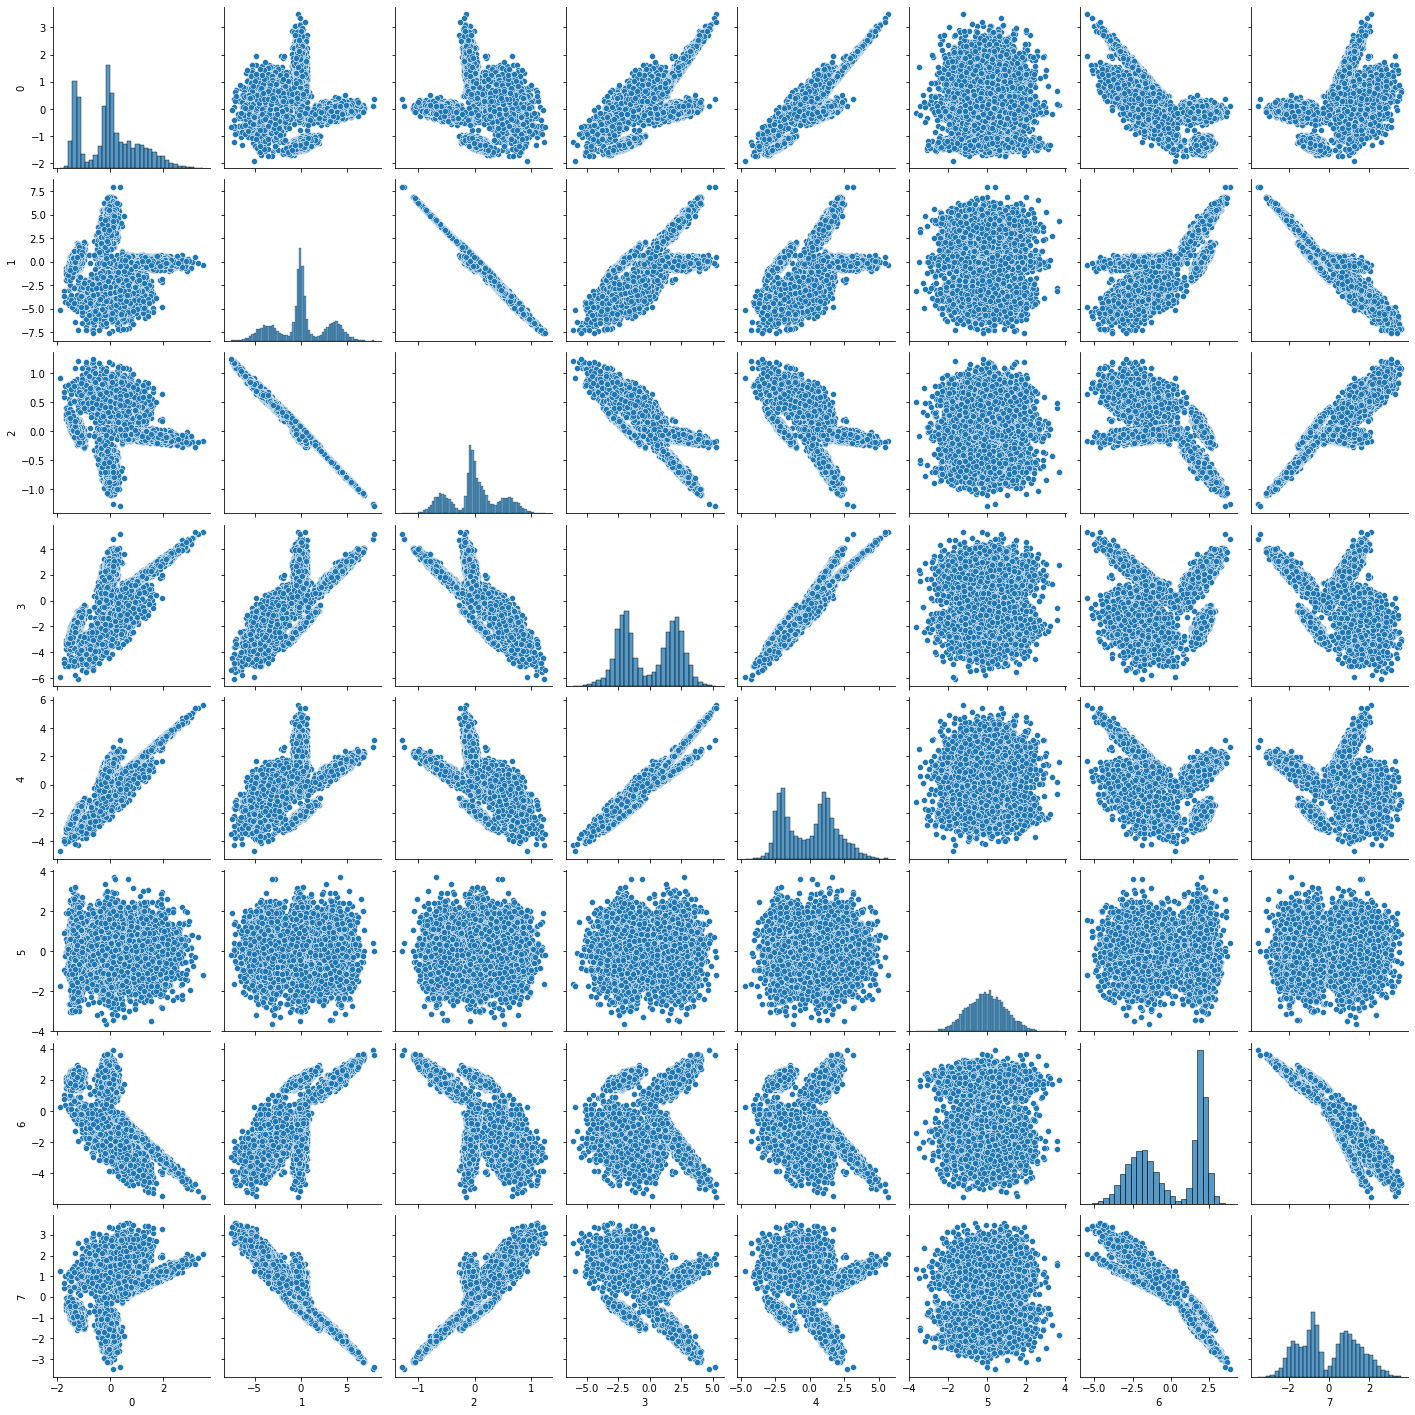

In [ ]:
sns.pairplot(data)

In [ ]:
corr= data.corr()
corr

,0,1,2,3,4,5,6,7
0,1.000000,-0.039921,-0.099961,0.697055,0.885713,-0.005983,-0.751306,0.446929
1,-0.039921,1.000000,-0.990208,0.688619,0.428504,-0.000259,0.689421,-0.911698
2,-0.099961,-0.990208,1.000000,-0.783105,-0.550445,0.001094,-0.581547,0.845413
3,0.697055,0.688619,-0.783105,1.000000,0.950254,-0.004528,-0.050504,-0.329888
4,0.885713,0.428504,-0.550445,0.950254,1.000000,-0.005531,-0.359070,-0.019437
5,-0.005983,-0.000259,0.001094,-0.004528,-0.005531,1.000000,0.004167,-0.002229
6,-0.751306,0.689421,-0.581547,-0.050504,-0.359070,0.004167,1.000000,-0.926155
7,0.446929,-0.911698,0.845413,-0.329888,-0.019437,-0.002229,-0.926155,1.000000


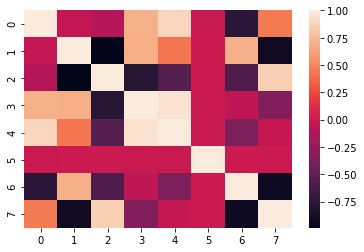

In [ ]:
sns.heatmap(corr)

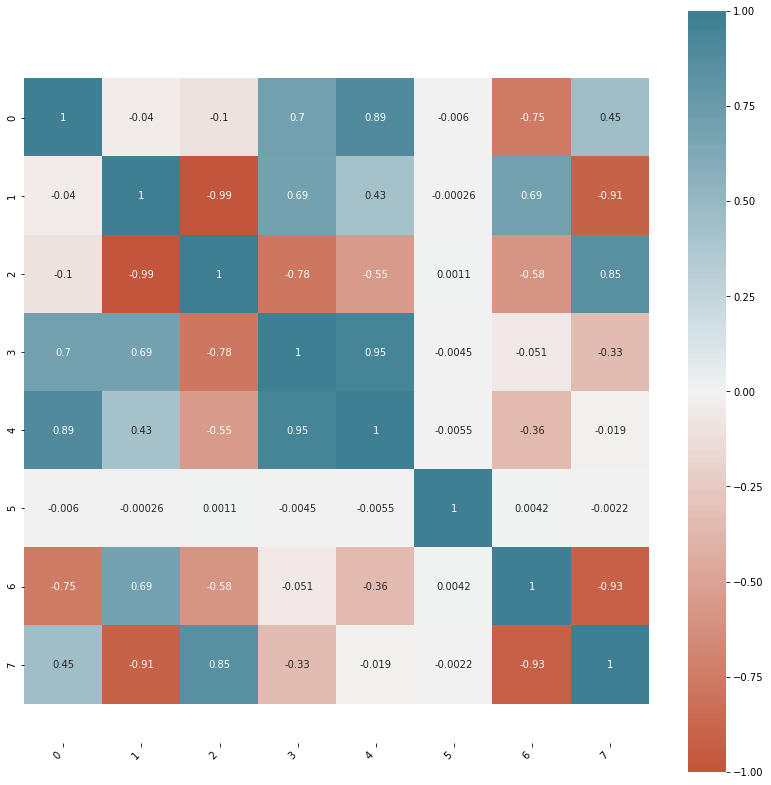

In [ ]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [ ]:
# Outlier detection with Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[1.54003382, 0.03649393, 0.17882443, ..., 0.29333187, 1.14053448,
        0.66591682],
       [0.15877124, 1.57443121, 1.58997778, ..., 0.34988753, 0.924781  ,
        1.34427648],
       [0.09498785, 2.19162854, 2.16911996, ..., 1.20516256, 1.51638749,
        2.00118558],
       ...,
       [0.0559592 , 1.21249207, 1.19956328, ..., 1.41856015, 0.84139392,
        1.10853326],
       [0.07967611, 0.76052891, 0.76845526, ..., 1.13651151, 0.44455388,
        0.64812665],
       [1.22663137, 0.19448018, 0.02228268, ..., 0.30066063, 1.01768351,
        0.67849168]])

In [ ]:
len(np.where(z > 3)[0])

32

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9932857142857143
Accuracy of test: 0.9886666666666667


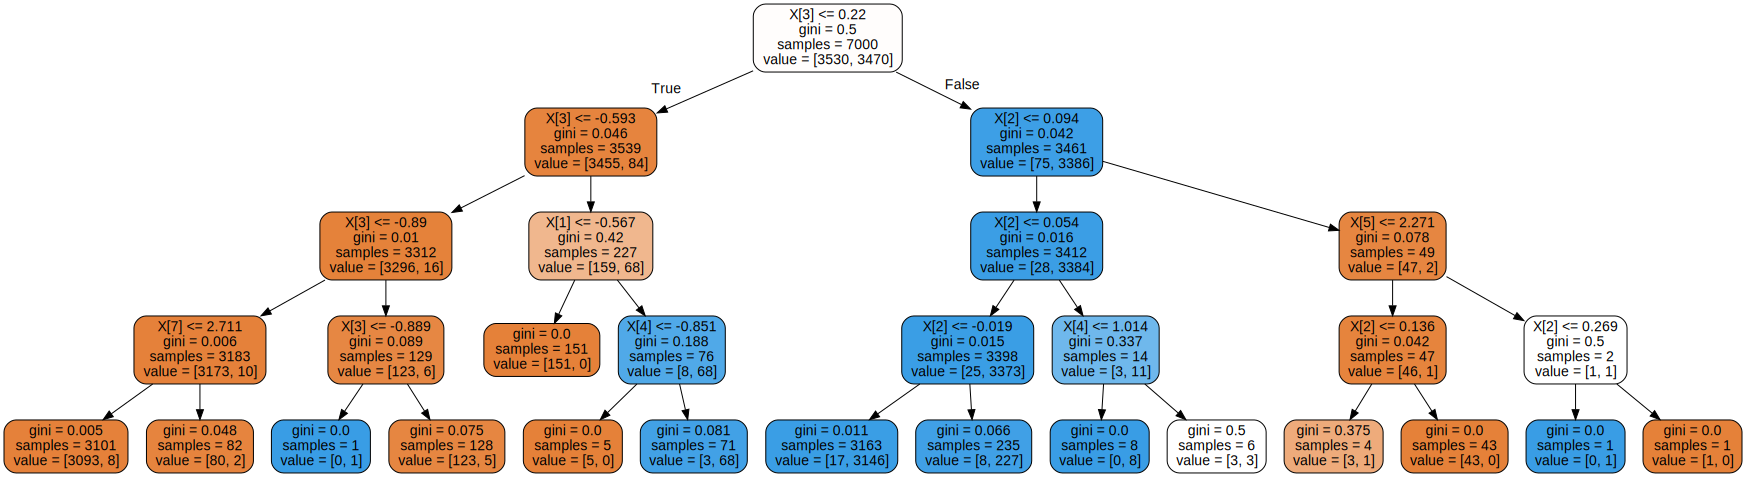

In [ ]:
import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf, out_file=None,
                    filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1469
           1       0.99      0.99      0.99      1531

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



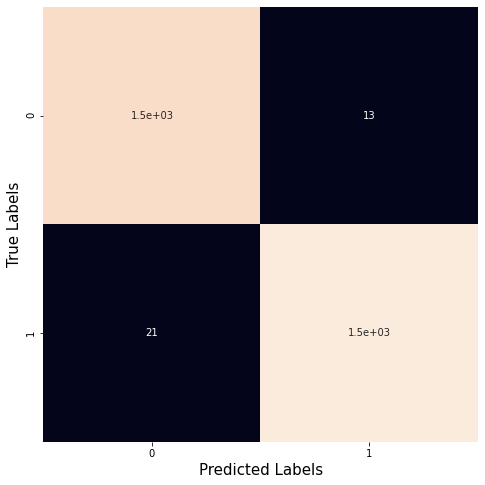

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'binary:logistic', 
         'num_class':2}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [ ]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.98324466, 0.01675534],
       [0.995836  , 0.00416393],
       [0.00724536, 0.99275464],
       [0.99777955, 0.00222041],
       [0.00724536, 0.99275464],
       [0.00724536, 0.99275464],
       [0.99777955, 0.00222041],
       [0.01399906, 0.98600096],
       [0.98853695, 0.01146303],
       [0.99777955, 0.00222041]], dtype=float32)

In [ ]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
best_preds

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.988310593557933
Recall = 0.9883490237385835
Accuracy = 0.9883333333333333


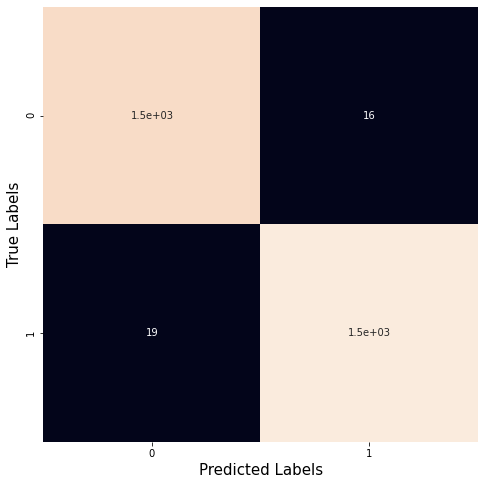

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500}
Mean of the cv scores is 0.992857
Train Score 0.995000
Test Score 0.988333
Seconds used for refitting the best model on the train dataset: 1.990280


In [ ]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()